In [35]:
#%% Smoothing Filtering
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('Kids_park.jpeg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_moving_avg = cv2.GaussianBlur(img, (9, 9),0)
cv2.imwrite('Gauss.jpg',img_moving_avg)
kernel = cv2.getGaussianKernel(9, 0)
kernel = kernel * kernel.T

laplacian_img = cv2.Laplacian(img_moving_avg, cv2.CV_64F)

laplacian = cv2.filter2D(laplacian_img,-1,kernel)

sobelx_img = cv2.Sobel(img_moving_avg, cv2.CV_64F, 1, 0, ksize=5)
sobely_img = cv2.Sobel(img_moving_avg, cv2.CV_64F, 0, 1, ksize=5)
sobel_img = np.sqrt(sobelx_img**2 + sobely_img**2)
sobel = cv2.filter2D(sobel_img,-1,kernel)

gaussian_img = cv2.GaussianBlur(img_moving_avg, (5, 5), 0)
usm_img = cv2.addWeighted(img_moving_avg, 1.5, gaussian_img, -0.5, 0)

canny_img = cv2.Canny(img_moving_avg, 100, 200)
canny = cv2.filter2D(canny_img,-1,kernel)

cv2.imwrite('laplacian_b.jpg',laplacian)

cv2.imwrite('sobel_b.jpg',sobel)

cv2.imwrite('usm_b.jpg',usm_img)

cv2.imwrite('canny_b.jpg',canny)

True

In [40]:
import cv2
import numpy as np

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('laplacian_b.jpg')

lpsnr = cv2.PSNR(img1, img2)

lapsnr= psnr(img1, img2)
lpsnr

6.321183655389792

In [30]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('sobel_noax.jpg')

sopsnr= psnr(img1, img2)
sopsnr

27.827807515701192

In [31]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('usm_noax.jpg')

usmpsnr= psnr(img1, img2)
usmpsnr

47.23146348533188

In [32]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('canny_noax.jpg')

capsnr= psnr(img1, img2)
capsnr

27.75227453028033

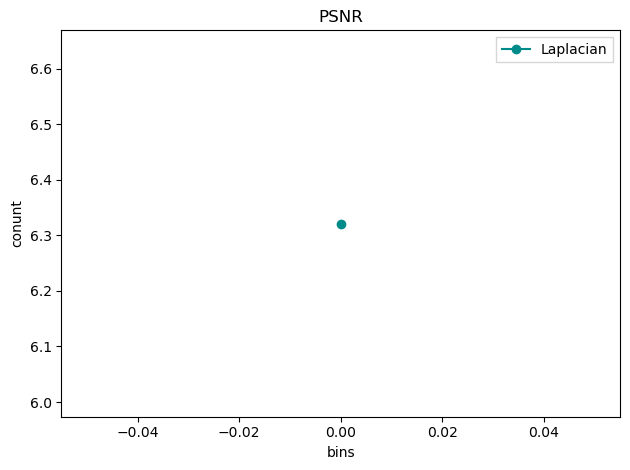

In [42]:
#PSNR low pass-band pass 그래프
plt.plot(lpsnr,marker='o',c='darkcyan',label='Laplacian') #파란색 그래프
'''
plt.plot(sopsnr, marker='D',c='darkmagenta',label='Sobel')
plt.plot(usmpsnr, marker='+',c='darkred',label='USM')
plt.plot(capsnr, marker='x',c='darkblue',label='Canny') #주황색 그래프
'''
plt.legend(shadow=False, fancybox=False, loc='upper right')
plt.title('PSNR'),plt.xlabel('bins'),plt.ylabel('conunt')
plt.tight_layout()
#plt.savefig('PSNR_sharp.jpg')
plt.show()